In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

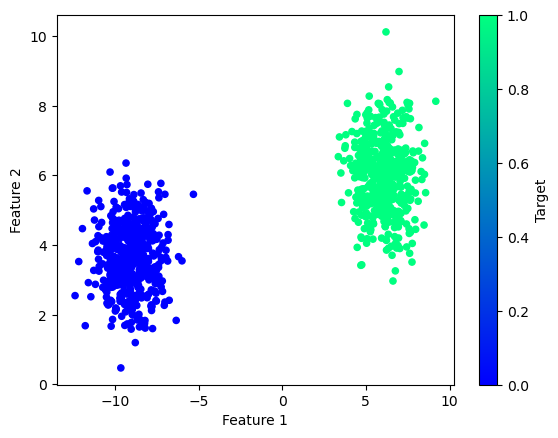

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 847us/step - loss: 0.5346 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 790us/step - loss: 0.5218 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 763us/step - loss: 0.5092 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 791us/step - loss: 0.4965 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 752us/step - loss: 0.4839 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 768us/step - loss: 0.4713 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 787us/step - loss: 0.4468 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 877us/step - loss: 0.4348 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 719us/step - loss: 0.4231 - accuracy

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0668 - accuracy: 1.0000 - 23ms/epoch - 3ms/step
Loss: 0.06680765748023987, Accuracy: 1.0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

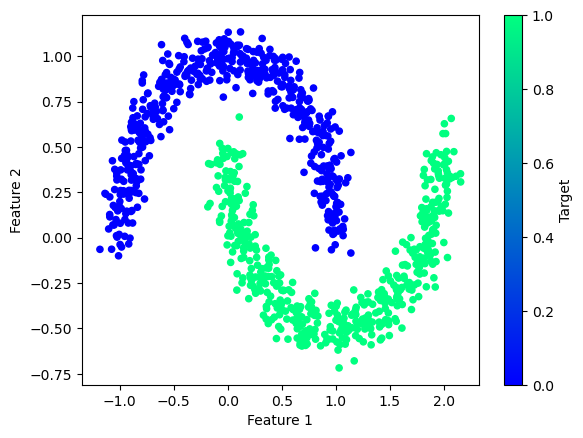

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 783us/step - loss: 1.1194 - accuracy: 0.4720
Epoch 2/100
24/24 [==============================] - 0s 819us/step - loss: 0.9801 - accuracy: 0.5040
Epoch 3/100
24/24 [==============================] - 0s 857us/step - loss: 0.8931 - accuracy: 0.5240
Epoch 4/100
24/24 [==============================] - 0s 768us/step - loss: 0.8347 - accuracy: 0.5493
Epoch 5/100
24/24 [==============================] - 0s 844us/step - loss: 0.7928 - accuracy: 0.5680
Epoch 6/100
24/24 [==============================] - 0s 854us/step - loss: 0.7604 - accuracy: 0.5813
Epoch 7/100
24/24 [==============================] - 0s 833us/step - loss: 0.7341 - accuracy: 0.5893
Epoch 8/100
24/24 [==============================] - 0s 851us/step - loss: 0.7128 - accuracy: 0.6053
Epoch 9/100
24/24 [==============================] - 0s 829us/step - loss: 0.6934 - accuracy: 0.6120
Epoch 10/100
24/24 [==============================] - 0s 829us/step - loss: 0.6767 - accura

<AxesSubplot:>

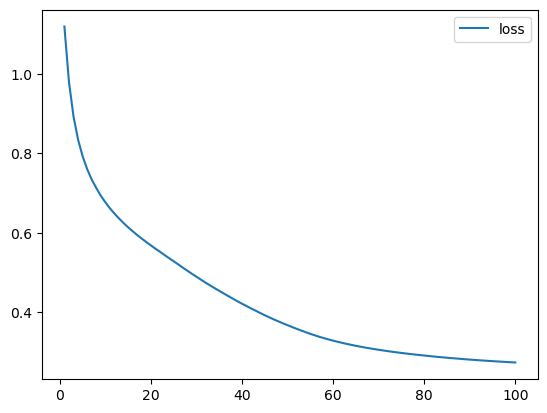

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

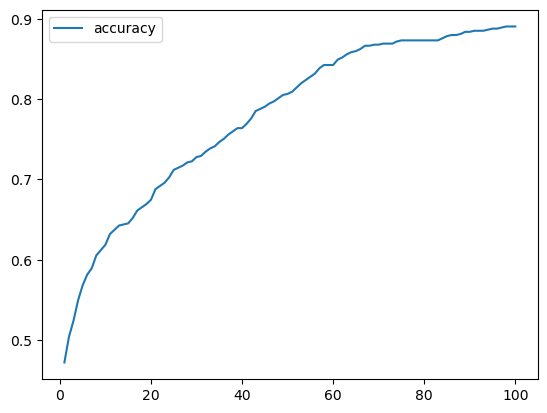

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.5053
Epoch 2/100
24/24 [==============================] - 0s 825us/step - loss: 0.7426 - accuracy: 0.5613
Epoch 3/100
24/24 [==============================] - 0s 886us/step - loss: 0.6995 - accuracy: 0.6267
Epoch 4/100
24/24 [==============================] - 0s 848us/step - loss: 0.6592 - accuracy: 0.6787
Epoch 5/100
24/24 [==============================] - 0s 805us/step - loss: 0.6208 - accuracy: 0.7213
Epoch 6/100
24/24 [==============================] - 0s 889us/step - loss: 0.5850 - accuracy: 0.7867
Epoch 7/100
24/24 [==============================] - 0s 805us/step - loss: 0.5514 - accuracy: 0.8293
Epoch 8/100
24/24 [==============================] - 0s 848us/step - loss: 0.5199 - accuracy: 0.8560
Epoch 9/100
24/24 [==============================] - 0s 876us/step - loss: 0.4909 - accuracy: 0.8653
Epoch 10/100
24/24 [==============================] - 0s 808us/step - loss: 0.4642 - accuracy